In [6]:
import awkward as ak
import vector
import fastjet
import math
import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import torch
import torch.nn as nn
import torch_geometric
import torchvision.transforms as tr
from torch_geometric.data import Batch
from torch_geometric.loader import DataLoader

plt.style.use(hep.style.CMS)
plt.rcParams.update({"font.size": 20})

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# load the clic dataset
data_ = torch.load("../data/clic_edm4hep_2023_02_27/p8_ee_tt_ecm380/processed/data_0.pt")
print(f"Total data: {len(data_)}")

Total data: 10000


In [70]:
def distinguish_tracks_from_clusters(batch):
    """Takes an event~Batch() and splits it into two Batch() objects representing the tracks/clusters."""

    is_track = (batch.x[:, 0] == 1)
    is_cluster = (batch.x[:, 0] == 2)    

    tracks = Batch(
        x=batch.x[is_track],
        ygen=batch.ygen[is_track],
        ygen_id=batch.ygen_id[is_track],
        ycand=batch.ycand[is_track],
        ycand_id=batch.ycand_id[is_track],
        batch=batch.batch[is_track],
    )
    clusters = Batch(
        x=batch.x[is_cluster],
        ygen=batch.ygen[is_cluster],
        ygen_id=batch.ygen_id[is_cluster],
        ycand=batch.ycand[is_cluster],
        ycand_id=batch.ycand_id[is_cluster],
        batch=batch.batch[is_cluster],
    )

    return tracks, clusters

In [71]:
# define input dimensions
X_FEATURES_TRK = {
    "type": 0,
    "pt": 1,
    "eta": 2,
    "sin_phi": 3,
    "cos_phi": 4,
    "p": 5,
    "chi2": 6,
    "ndf": 7,
    "dEdx": 8,
    "dEdxError": 9,
    "radiusOfInnermostHit": 10,
    "tanLambda": 11,
    "D0": 12,
    "omega": 13,
    "Z0": 14,
    "time": 15
}

In [147]:
data_ = torch.load("../data/new_clic/p8_ee_tt_ecm380/processed/data_0.pt")
loader = DataLoader(data_, 5000)

for i, ev in enumerate(loader):
    tracks, _ = distinguish_tracks_from_clusters(ev)
    break

In [148]:
tracks

Batch(x=[247734, 17], ygen=[247734, 6], ygen_id=[247734], ycand=[247734, 6], ycand_id=[247734], batch=[247734])

In [149]:
# # new
is_any = (tracks.ygen_id!=-1)
is_not_null = (tracks.ygen_id<=4)
is_null = (tracks.ygen_id>4)
is_chhad = (tracks.ygen_id==0)
is_nhad = (tracks.ygen_id==1)
is_gamma = (tracks.ygen_id==2)
is_ele = (tracks.ygen_id==3)
is_mu = (tracks.ygen_id==4)

# old
# is_any = (tracks.ygen_id!=-1)
# is_not_null = (tracks.ygen_id!=0)
# is_null = (tracks.ygen_id==0)
# is_chhad = (tracks.ygen_id==1)
# is_nhad = (tracks.ygen_id==2)
# is_gamma = (tracks.ygen_id==3)
# is_ele = (tracks.ygen_id==4)
# is_mu = (tracks.ygen_id==5)

In [158]:
# new
is_any = (tracks.ycand_id!=-1)
is_not_null = (tracks.ycand_id<=4)
is_null = (tracks.ycand_id>4)
is_chhad = (tracks.ycand_id==0)
is_nhad = (tracks.ycand_id==1)
is_gamma = (tracks.ycand_id==2)
is_ele = (tracks.ycand_id==3)
is_mu = (tracks.ycand_id==4)

# # old
# is_any = (tracks.ycand_id!=-1)
# is_not_null = (tracks.ycand_id!=0)
# is_null = (tracks.ycand_id==0)
# is_chhad = (tracks.ycand_id==1)
# is_nhad = (tracks.ycand_id==2)
# is_gamma = (tracks.ycand_id==3)
# is_ele = (tracks.ycand_id==4)
# is_mu = (tracks.ycand_id==5)

In [159]:
# number of tracks linked to a Null
(100*is_null.sum()/is_any.sum()).item()

0.0

In [160]:
# number of tracks linked to a charged hadron
(100*is_chhad.sum()/is_any.sum()).item()

92.42050170898438

In [161]:
# number of tracks linked to a neutral hadron
(100*is_nhad.sum()/is_any.sum()).item()

0.0

In [162]:
# number of tracks linked to a gamma
(100*is_gamma.sum()/is_any.sum()).item()

0.0

In [163]:
# number of tracks that are electrons
(100*is_ele.sum()/is_any.sum()).item()

5.910371780395508

In [164]:
# number of tracks that are muons
(100*is_mu.sum()/is_any.sum()).item()

1.6691290140151978

In [108]:
! ls ../data/old_clic/p8_ee_tt_ecm380/raw/reco_p8_ee_tt_ecm380_1.parquet

reco_p8_ee_tt_ecm380_1.parquet     reco_p8_ee_tt_ecm380_1157.parquet
reco_p8_ee_tt_ecm380_10.parquet    reco_p8_ee_tt_ecm380_1158.parquet
reco_p8_ee_tt_ecm380_100.parquet   reco_p8_ee_tt_ecm380_1159.parquet
reco_p8_ee_tt_ecm380_1000.parquet  reco_p8_ee_tt_ecm380_116.parquet
reco_p8_ee_tt_ecm380_10000.parquet reco_p8_ee_tt_ecm380_1160.parquet
reco_p8_ee_tt_ecm380_10001.parquet reco_p8_ee_tt_ecm380_1161.parquet
reco_p8_ee_tt_ecm380_10002.parquet reco_p8_ee_tt_ecm380_1162.parquet
reco_p8_ee_tt_ecm380_10003.parquet reco_p8_ee_tt_ecm380_1163.parquet
reco_p8_ee_tt_ecm380_10004.parquet reco_p8_ee_tt_ecm380_1164.parquet
reco_p8_ee_tt_ecm380_10005.parquet reco_p8_ee_tt_ecm380_1165.parquet
reco_p8_ee_tt_ecm380_10006.parquet reco_p8_ee_tt_ecm380_1166.parquet
reco_p8_ee_tt_ecm380_10007.parquet reco_p8_ee_tt_ecm380_1167.parquet
reco_p8_ee_tt_ecm380_10008.parquet reco_p8_ee_tt_ecm380_1168.parquet
reco_p8_ee_tt_ecm380_10009.parquet reco_p8_ee_tt_ecm380_1169.parquet
reco_p8_ee_tt_ecm380_1001.parquet  

In [94]:
fn = "../data/old_clic/p8_ee_tt_ecm380/raw/reco_p8_ee_tt_ecm380_1.parquet"

In [95]:
with_jet_idx=True
new_setup=False

In [96]:
    ret = ak.from_parquet(fn)

    X_track = ret["X_track"]
    X_cluster = ret["X_cluster"]

    assert len(X_track) == len(X_cluster)
    nev = len(X_track)

    Xs = []
    ygens = []
    ycands = []
    for iev in range(nev):

        X1 = ak.to_numpy(X_track[iev])
        X2 = ak.to_numpy(X_cluster[iev])

        if len(X1) == 0 or len(X2) == 0:
            continue

        ygen_track = ak.to_numpy(ret["ygen_track"][iev])
        ygen_cluster = ak.to_numpy(ret["ygen_cluster"][iev])

        # add null stuff
        if new_setup:
            ygen_null_track = ak.to_numpy(ret["ygen_null_track"][iev])
            ygen_null_cluster = ak.to_numpy(ret["ygen_null_cluster"][iev])

        ycand_track = ak.to_numpy(ret["ycand_track"][iev])
        ycand_cluster = ak.to_numpy(ret["ycand_cluster"][iev])

        if len(ygen_track) == 0 or len(ygen_cluster) == 0:
            continue

        # pad feature dim between tracks and clusters to the same size
        if X1.shape[1] < X2.shape[1]:
            X1 = np.pad(X1, [[0, 0], [0, X2.shape[1] - X1.shape[1]]])
        if X2.shape[1] < X1.shape[1]:
            X2 = np.pad(X2, [[0, 0], [0, X1.shape[1] - X2.shape[1]]])

        # concatenate tracks and clusters in features and targets
        X = np.concatenate([X1, X2])
        ygen = np.concatenate([ygen_track, ygen_cluster])
        if new_setup:
            ygen_null = np.concatenate([ygen_null_track, ygen_null_cluster])
        ycand = np.concatenate([ycand_track, ycand_cluster])

        assert ygen.shape[0] == X.shape[0]
        if new_setup:
            assert ygen_null.shape[0] == X.shape[0]
        assert ycand.shape[0] == X.shape[0]
          

        # add jet_idx column
        if with_jet_idx:
            ygen = np.concatenate(
                [
                    ygen.astype(np.float32),
                    np.zeros((len(ygen), 1), dtype=np.float32),
                ],
                axis=-1,
            )
            if new_setup:
                ygen_null = np.concatenate(
                    [
                        ygen_null.astype(np.float32),
                        np.zeros((len(ygen_null), 1), dtype=np.float32),
                    ],
                    axis=-1,
                )
            ycand = np.concatenate(
                [
                    ycand.astype(np.float32),
                    np.zeros((len(ycand), 1), dtype=np.float32),
                ],
                axis=-1,
            )

        if new_setup:
            labels = {
                0: 0,  # unused in the end when we combine the primaries and the nulls because there are no overlap between them
                211: 0,
                130: 1,
                22: 2,
                11: 3,
                13: 4,
            }

            labels_null = {
                0: 0,  # unused in the end when we combine the primaries and the nulls because there are no overlap between them
                211: 5,
                130: 6,
                22: 7,
                11: 8,
                13: 9,
            }
        else:
            labels = {
                0: 0,
                211: 1,
                130: 2,
                22: 3,
                11: 4,
                13: 5,
            }  
            
        # replace PID with index in labels array
        arr = np.array([labels[p] for p in ygen[:, 0]])
        ygen[:, 0][:] = arr[:]

        if new_setup:
            arr = np.array([labels_null[p] for p in ygen_null[:, 0]])
            ygen_null[:, 0][:] = arr[:]

        arr = np.array([labels[p] for p in ycand[:, 0]])
        ycand[:, 0][:] = arr[:]

        if with_jet_idx:
            # prepare gen candidates for clustering
            cls_id = ygen[..., 0]
            valid = cls_id != 0
            # save mapping of index after masking -> index before masking as numpy array
            # inspired from:
            # https://stackoverflow.com/questions/432112/1044443#comment54747416_1044443
            cumsum = np.cumsum(valid) - 1
            _, index_mapping = np.unique(cumsum, return_index=True)

            pt = ygen[valid, Y_FEATURES.index("pt")]
            eta = ygen[valid, Y_FEATURES.index("eta")]
            sin_phi = ygen[valid, Y_FEATURES.index("sin_phi")]
            cos_phi = ygen[valid, Y_FEATURES.index("cos_phi")]
            phi = np.arctan2(sin_phi, cos_phi)
            energy = ygen[valid, Y_FEATURES.index("energy")]
            vec = vector.awk(ak.zip({"pt": pt, "eta": eta, "phi": phi, "energy": energy}))

            # cluster jets, sort jet indices in descending order by pt
            cluster = fastjet.ClusterSequence(vec.to_xyzt(), jetdef)
            jets = vector.awk(cluster.inclusive_jets(min_pt=min_jet_pt))
            sorted_jet_idx = ak.argsort(jets.pt, axis=-1, ascending=False).to_list()
            # retrieve corresponding indices of constituents
            constituent_idx = cluster.constituent_index(min_pt=min_jet_pt).to_list()

            # add index information to ygen and ycand
            # index jets in descending order by pt starting from 1:
            # 0 is null (unclustered),
            # 1 is 1st highest-pt jet,
            # 2 is 2nd highest-pt jet, ...
            for jet_idx in sorted_jet_idx:
                jet_constituents = [
                    index_mapping[idx] for idx in constituent_idx[jet_idx]
                ]  # map back to constituent index *before* masking
                ygen[jet_constituents, Y_FEATURES.index("jet_idx")] = jet_idx + 1  # jet index starts from 1
                ycand[jet_constituents, Y_FEATURES.index("jet_idx")] = jet_idx + 1

        Xs.append(X)
        # combine the primaries and the nulls but first assert that there's no overlap
        if new_setup:
            assert np.all((ygen.sum(axis=1) != 0) & (ygen_null.sum(axis=1) != 0)) == 0
            ygens.append(ygen + ygen_null)
        else:
            ygens.append(ygen)
        ycands.append(ycand)
        break

In [60]:
(ygen + ygen_null)[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 7., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       7., 5., 5., 2., 5., 6., 5., 5., 5., 2., 5., 6., 5., 5., 5., 0., 0.,
       5., 2., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 7., 7., 7., 7., 2., 7., 7., 2., 5., 5., 7., 7., 5., 5., 0.,
       7., 7., 7., 7., 7., 5., 5., 2., 2., 2., 2., 2., 5., 7., 7., 2., 7.,
       7., 2., 2., 2., 5., 9., 5., 2., 7., 7., 7., 1., 1., 7., 7., 2., 2.,
       2., 5., 5., 2., 2., 2., 7., 2., 2., 2., 2., 2., 2., 7., 2., 2., 2.,
       5., 2., 2., 2., 2., 2., 2., 2., 2., 1.], dtype=float32)

In [97]:
ygen[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 3., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 2., 2.,
       0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 3., 0., 0., 3., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 3., 3., 0., 0., 0., 3., 0.,
       0., 3., 3., 3., 0., 0., 0., 3., 0., 0., 0., 2., 2., 0., 0., 3., 3.,
       3., 0., 0., 3., 3., 3., 0., 3., 3., 3., 3., 3., 3., 0., 3., 3., 3.,
       0., 3., 3., 3., 3., 3., 3., 3., 3., 2.], dtype=float32)

In [66]:
# 130 -> 1
# 22 -> 2
# 
((ygen + ygen_null)[:,0]==2).sum()

38

In [68]:
(new==22).sum()

38

In [77]:
ev1 = ev.x[ev.batch==0]
ev1_y = ev.ygen_id[ev.batch==0]

In [97]:
phi_min = 0.9
phi_max = 1.15
eta_min = 0.9
eta_max = 1.15

cphi = ev1[:, X_FEATURES_TRK["cos_phi"]]
sphi = ev1[:, X_FEATURES_TRK["sin_phi"]]
phi = np.arctan(sphi/cphi)
eta = ev1[:, X_FEATURES_TRK["eta"]]

In [98]:
phi_ = (phi>phi_min) & (phi<phi_max)
eta_ = (eta>eta_min) & (eta<eta_max)

phi_eta_ = phi_ & eta_

In [99]:
ev1[phi_eta_]

tensor([[ 1.0000e+00,  6.6784e-01,  9.8016e-01,  8.6523e-01,  5.0137e-01,
          1.0152e+00,  1.2207e+01,  1.1000e+01,  0.0000e+00,  0.0000e+00,
          3.1335e+01,  1.1448e+00,  7.6359e-03, -1.7968e-03,  7.4497e-03,
         -1.0000e+00,  0.0000e+00],
        [ 2.0000e+00,  2.4626e-01,  1.1310e+00,  9.0268e-01,  4.3031e-01,
          4.2127e-01,  5.3067e+02,  1.4460e+03,  1.4162e+03,  6.2433e-01,
          4.1151e-01,  0.0000e+00,  0.0000e+00,  1.9000e+01,  9.9418e+00,
          1.6710e+01,  1.9169e+01],
        [ 2.0000e+00,  4.5232e-01,  9.8169e-01,  9.0916e-01,  4.1644e-01,
          6.8835e-01, -7.7264e+02,  5.0400e+02,  2.3825e+03,  7.1698e-01,
          5.5412e-01,  0.0000e+00,  0.0000e+00,  3.3000e+01,  7.1407e+00,
          1.8934e+01,  3.5927e+01]])

In [100]:
ev1_y[phi_eta_]

tensor([1, 0, 0])

# Data exploration

In [6]:
plt.rcParams.update({"font.size": 20})

In [7]:
loader = torch_geometric.loader.DataLoader(data_, 100)

In [8]:
tracks = None
for i, ev in enumerate(loader):
    tracks_, _ = distinguish_tracks_from_clusters(ev)
    if tracks == None:
        tracks = tracks_.x
    else:
        tracks = torch.cat([tracks, tracks_.x], axis=0)
    if i==10:
        break

In [9]:
print(f"tracks: {tracks.shape}")

tracks: torch.Size([54683, 17])


## Tracks

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


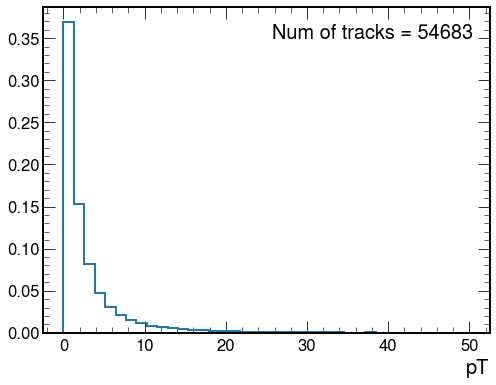

In [45]:
index_ = X_FEATURES_TRK["pt"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 50, 40)
ax.hist(tracks[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of tracks = {len(tracks)}")
ax.set_xlabel("pT");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


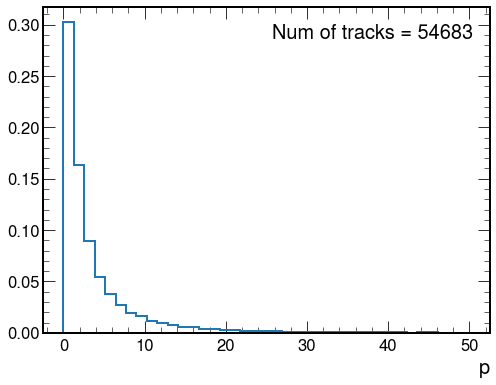

In [46]:
index_ = X_FEATURES_TRK["p"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 50, 40)
ax.hist(tracks[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of tracks = {len(tracks)}")
ax.set_xlabel("p");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


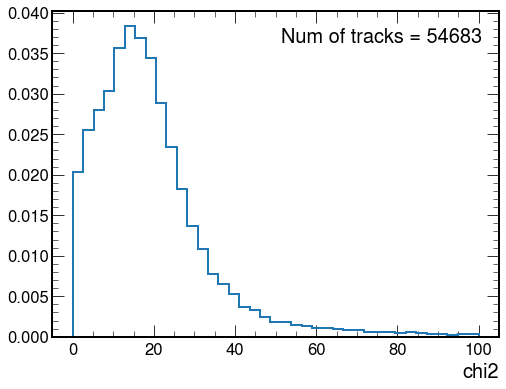

In [51]:
index_ = X_FEATURES_TRK["chi2"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 100, 40)
ax.hist(tracks[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of tracks = {len(tracks)}")
ax.set_xlabel("chi2");
# ax.set_ylim(0, 25000)

In [71]:
# dEdx is always 0
index_ = X_FEATURES_TRK["dEdx"]
(tracks[:,index_]!=0).sum()

tensor(0)

In [81]:
# dEdxError is always 0
index_ = X_FEATURES_TRK["dEdxError"]
(tracks[:,index_]!=0).sum()

tensor(0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


tensor([ 31.2724,  31.1882,  33.3190,  ...,  31.2697, 342.4715, 339.9917])

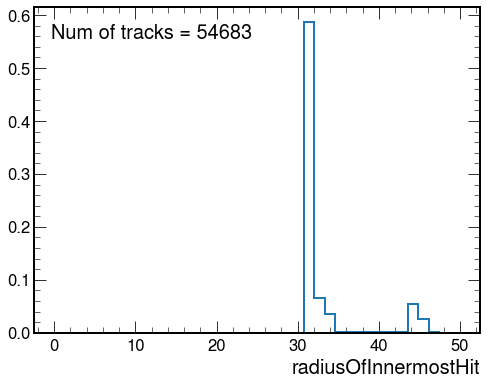

In [86]:
index_ = X_FEATURES_TRK["radiusOfInnermostHit"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 50, 40)
ax.hist(tracks[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of tracks = {len(tracks)}")
ax.set_xlabel("radiusOfInnermostHit");
# ax.set_ylim(0, 25000)

index_ = X_FEATURES_TRK["radiusOfInnermostHit"]
tracks[:,index_]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


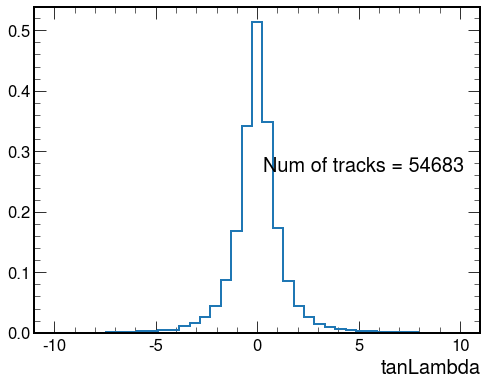

In [90]:
index_ = X_FEATURES_TRK["tanLambda"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(-10, 10, 40)
ax.hist(tracks[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of tracks = {len(tracks)}")
ax.set_xlabel("tanLambda");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


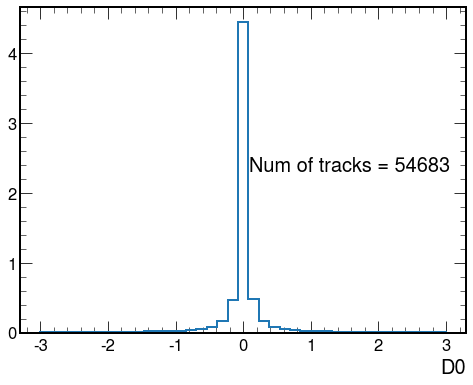

In [94]:
index_ = X_FEATURES_TRK["D0"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(-3, 3, 40)
ax.hist(tracks[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of tracks = {len(tracks)}")
ax.set_xlabel("D0");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


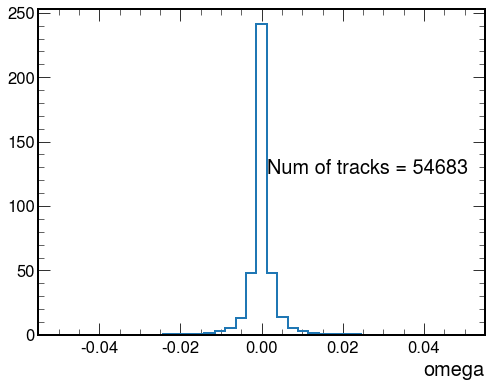

In [98]:
index_ = X_FEATURES_TRK["omega"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(-0.05, 0.05, 40)
ax.hist(tracks[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of tracks = {len(tracks)}")
ax.set_xlabel("omega");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


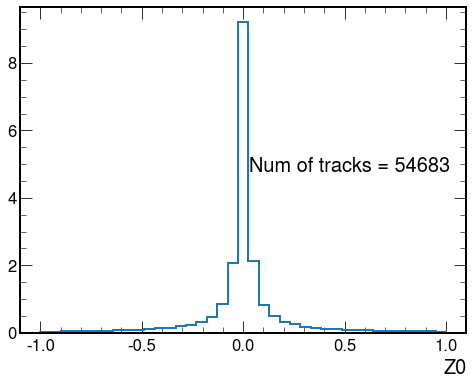

In [102]:
index_ = X_FEATURES_TRK["Z0"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(-1, 1, 40)
ax.hist(tracks[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of tracks = {len(tracks)}")
ax.set_xlabel("Z0");
# ax.set_ylim(0, 25000)